  Weather Road_Condition Time_of_Day  Speed_Limit  Vehicles_Involved  \
0   Foggy            Icy   Afternoon           59                  3   
1   Clear            Icy     Morning          115                  4   
2   Foggy            Icy     Morning           36                  4   
3   Foggy            Icy       Night           64                  3   
4   Clear            Dry     Morning           84                  1   

  Accident_Severity  
0             Minor  
1             Minor  
2             Minor  
3             Minor  
4            Severe  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Weather            1000 non-null   object
 1   Road_Condition     1000 non-null   object
 2   Time_of_Day        1000 non-null   object
 3   Speed_Limit        1000 non-null   int64 
 4   Vehicles_Involved  1000 non-null   int64 
 

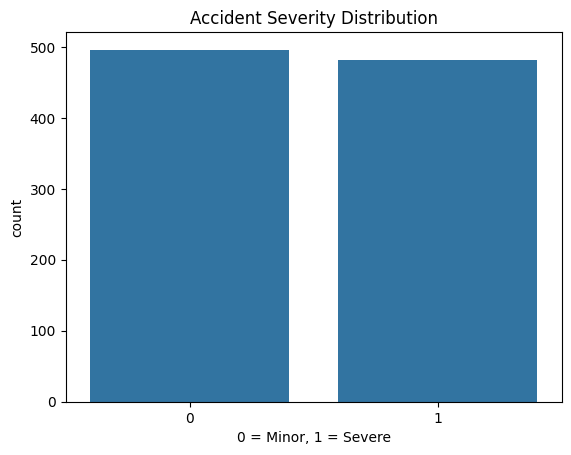

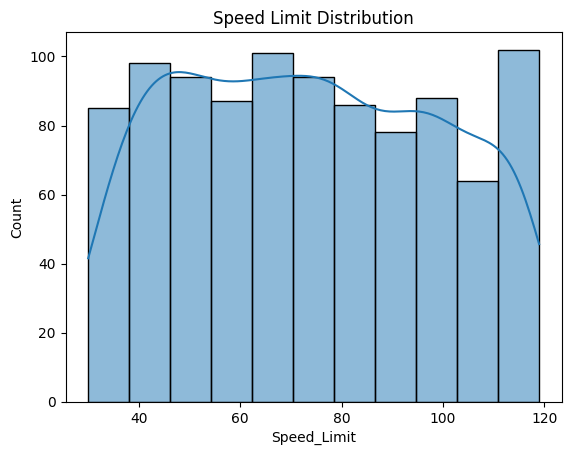

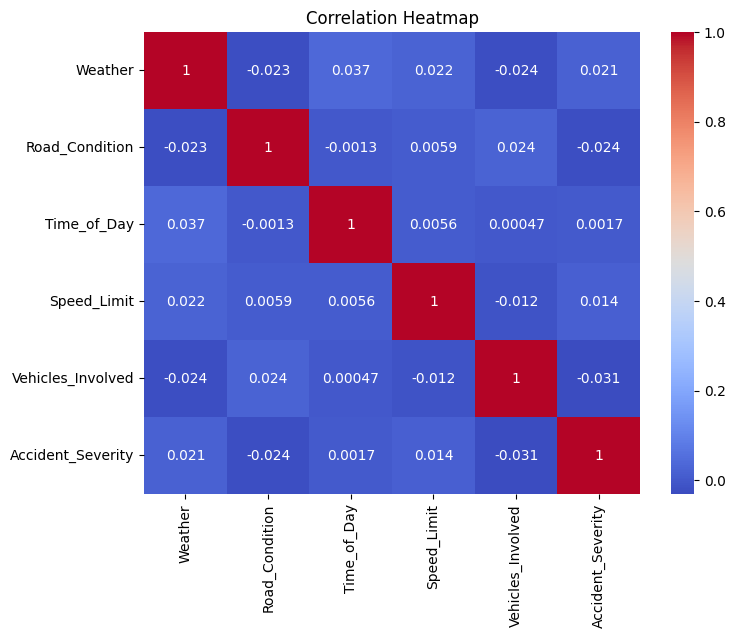

Accuracy Score: 0.47959183673469385

Confusion Matrix:
 [[68 22]
 [80 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.76      0.57        90
           1       0.54      0.25      0.34       106

    accuracy                           0.48       196
   macro avg       0.50      0.50      0.45       196
weighted avg       0.50      0.48      0.45       196



,Weather,Road_Condition,Time_of_Day,Speed_Limit,Vehicles_Involved,Accident_Severity
0,1,1,0,59,3,0
1,0,1,1,115,4,0
2,1,1,1,36,4,0
3,1,1,2,64,3,0
4,0,0,1,84,1,1
...,...,...,...,...,...,...
995,2,0,2,54,2,0
996,2,1,1,89,2,0
997,1,2,1,119,3,0
998,1,1,0,94,4,1


In [6]:
# -- coding: utf-8 --

"""
Traffic Accident Data Analysis and Visualization
"""

# -----------------------------
# Import required libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# Dataset Creation (1000 Records)
# -----------------------------
np.random.seed(42)

data = {
    "Weather": np.random.choice(["Clear", "Rainy", "Foggy"], 1000),
    "Road_Condition": np.random.choice(["Dry", "Wet", "Icy"], 1000),
    "Time_of_Day": np.random.choice(["Morning", "Afternoon", "Night"], 1000),
    "Speed_Limit": np.random.randint(30, 120, 1000),
    "Vehicles_Involved": np.random.randint(1, 5, 1000),
    "Accident_Severity": np.random.choice(["Minor", "Severe"], 1000)
}

df = pd.DataFrame(data)

# -----------------------------
# Dataset Overview
# -----------------------------
print(df.head())
print(df.info())

# -----------------------------
# Remove duplicate records
# -----------------------------
df.drop_duplicates(inplace=True)

# -----------------------------
# Encode categorical columns (CORRECT WAY)
# -----------------------------
encoder = LabelEncoder()

categorical_cols = ["Weather", "Road_Condition", "Time_of_Day", "Accident_Severity"]
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# -----------------------------
# Exploratory Data Analysis (EDA)
# -----------------------------
plt.figure()
sns.countplot(x=df["Accident_Severity"])
plt.title("Accident Severity Distribution")
plt.xlabel("0 = Minor, 1 = Severe")
plt.show()

plt.figure()
sns.histplot(df["Speed_Limit"], kde=True)
plt.title("Speed Limit Distribution")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# Feature Selection
# -----------------------------
X = df.drop("Accident_Severity", axis=1)
y = df["Accident_Severity"]

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# Model Building
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# -----------------------------
# Prediction
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# Model Evaluation
# -----------------------------
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# Display dataset (SAFE)
# -----------------------------
df
